In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.mixture import GaussianMixture

In [2]:
train = pd.read_csv('train.csv')
#train = train[train['y'] < 220]
label = train['y'].values.reshape(-1,1)
train.shape

(4209, 378)

In [3]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Removal of non informative columns
counts = train.loc[:,'X11':].apply(pd.value_counts)
inner_corr = train[counts.dropna(axis='columns').columns]

In [5]:
#Correlation between independent variables
corr = inner_corr.corr()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.70).any()

In [17]:
#PCA
pca = decomposition.PCA(.95)
pca.fit(inner_corr[corr.loc[m,m].columns])
train_data_reduced = pca.transform(inner_corr[corr.loc[m,m].columns])
pca.explained_variance_ratio_
train_data_reduced = pd.DataFrame(train_data_reduced, columns = ['PC'+str(i) for i in range (train_data_reduced.shape[1])])
train_data_PCA = pd.concat((train[['y']],train_data_reduced),axis = 1)
train_data_PCA = train_data_PCA[train_data_PCA['y'] < 220]

,y,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,130.81,-0.514484,0.049714,0.959626,1.184171,0.087532,-0.609556,0.050739,0.860603,0.259079,...,-0.186260,-0.273172,-0.541045,-0.050068,0.314984,-0.202718,0.209843,-0.163631,0.007651,0.142677
1,88.53,0.244554,-0.748090,-0.287462,0.289603,0.174567,-0.389231,-0.337533,0.346942,-0.297664,...,-0.138656,0.033236,0.102590,-0.213622,0.280617,0.096821,0.232849,-0.158889,-0.016580,0.100279
2,76.26,-0.055614,1.050910,0.481622,0.678288,0.368476,-0.428018,0.503301,-0.942330,-0.990415,...,0.044455,0.110034,0.177507,0.077436,-0.139056,0.182139,0.119234,-0.062550,-0.135976,-0.077141
3,80.62,-0.511868,0.719083,0.807662,0.221973,-0.062624,-0.937227,-0.446952,-1.259870,-0.971591,...,-0.133703,0.034268,0.062164,-0.027021,-0.071589,-0.021295,0.032695,-0.075510,-0.029322,-0.017385
4,78.02,-0.295291,0.936631,0.527619,0.197809,0.121073,-0.882853,-0.367694,-1.210155,-0.896359,...,0.008618,0.024253,0.083607,-0.008080,-0.097683,-0.030873,-0.001114,-0.042916,-0.014408,-0.006924


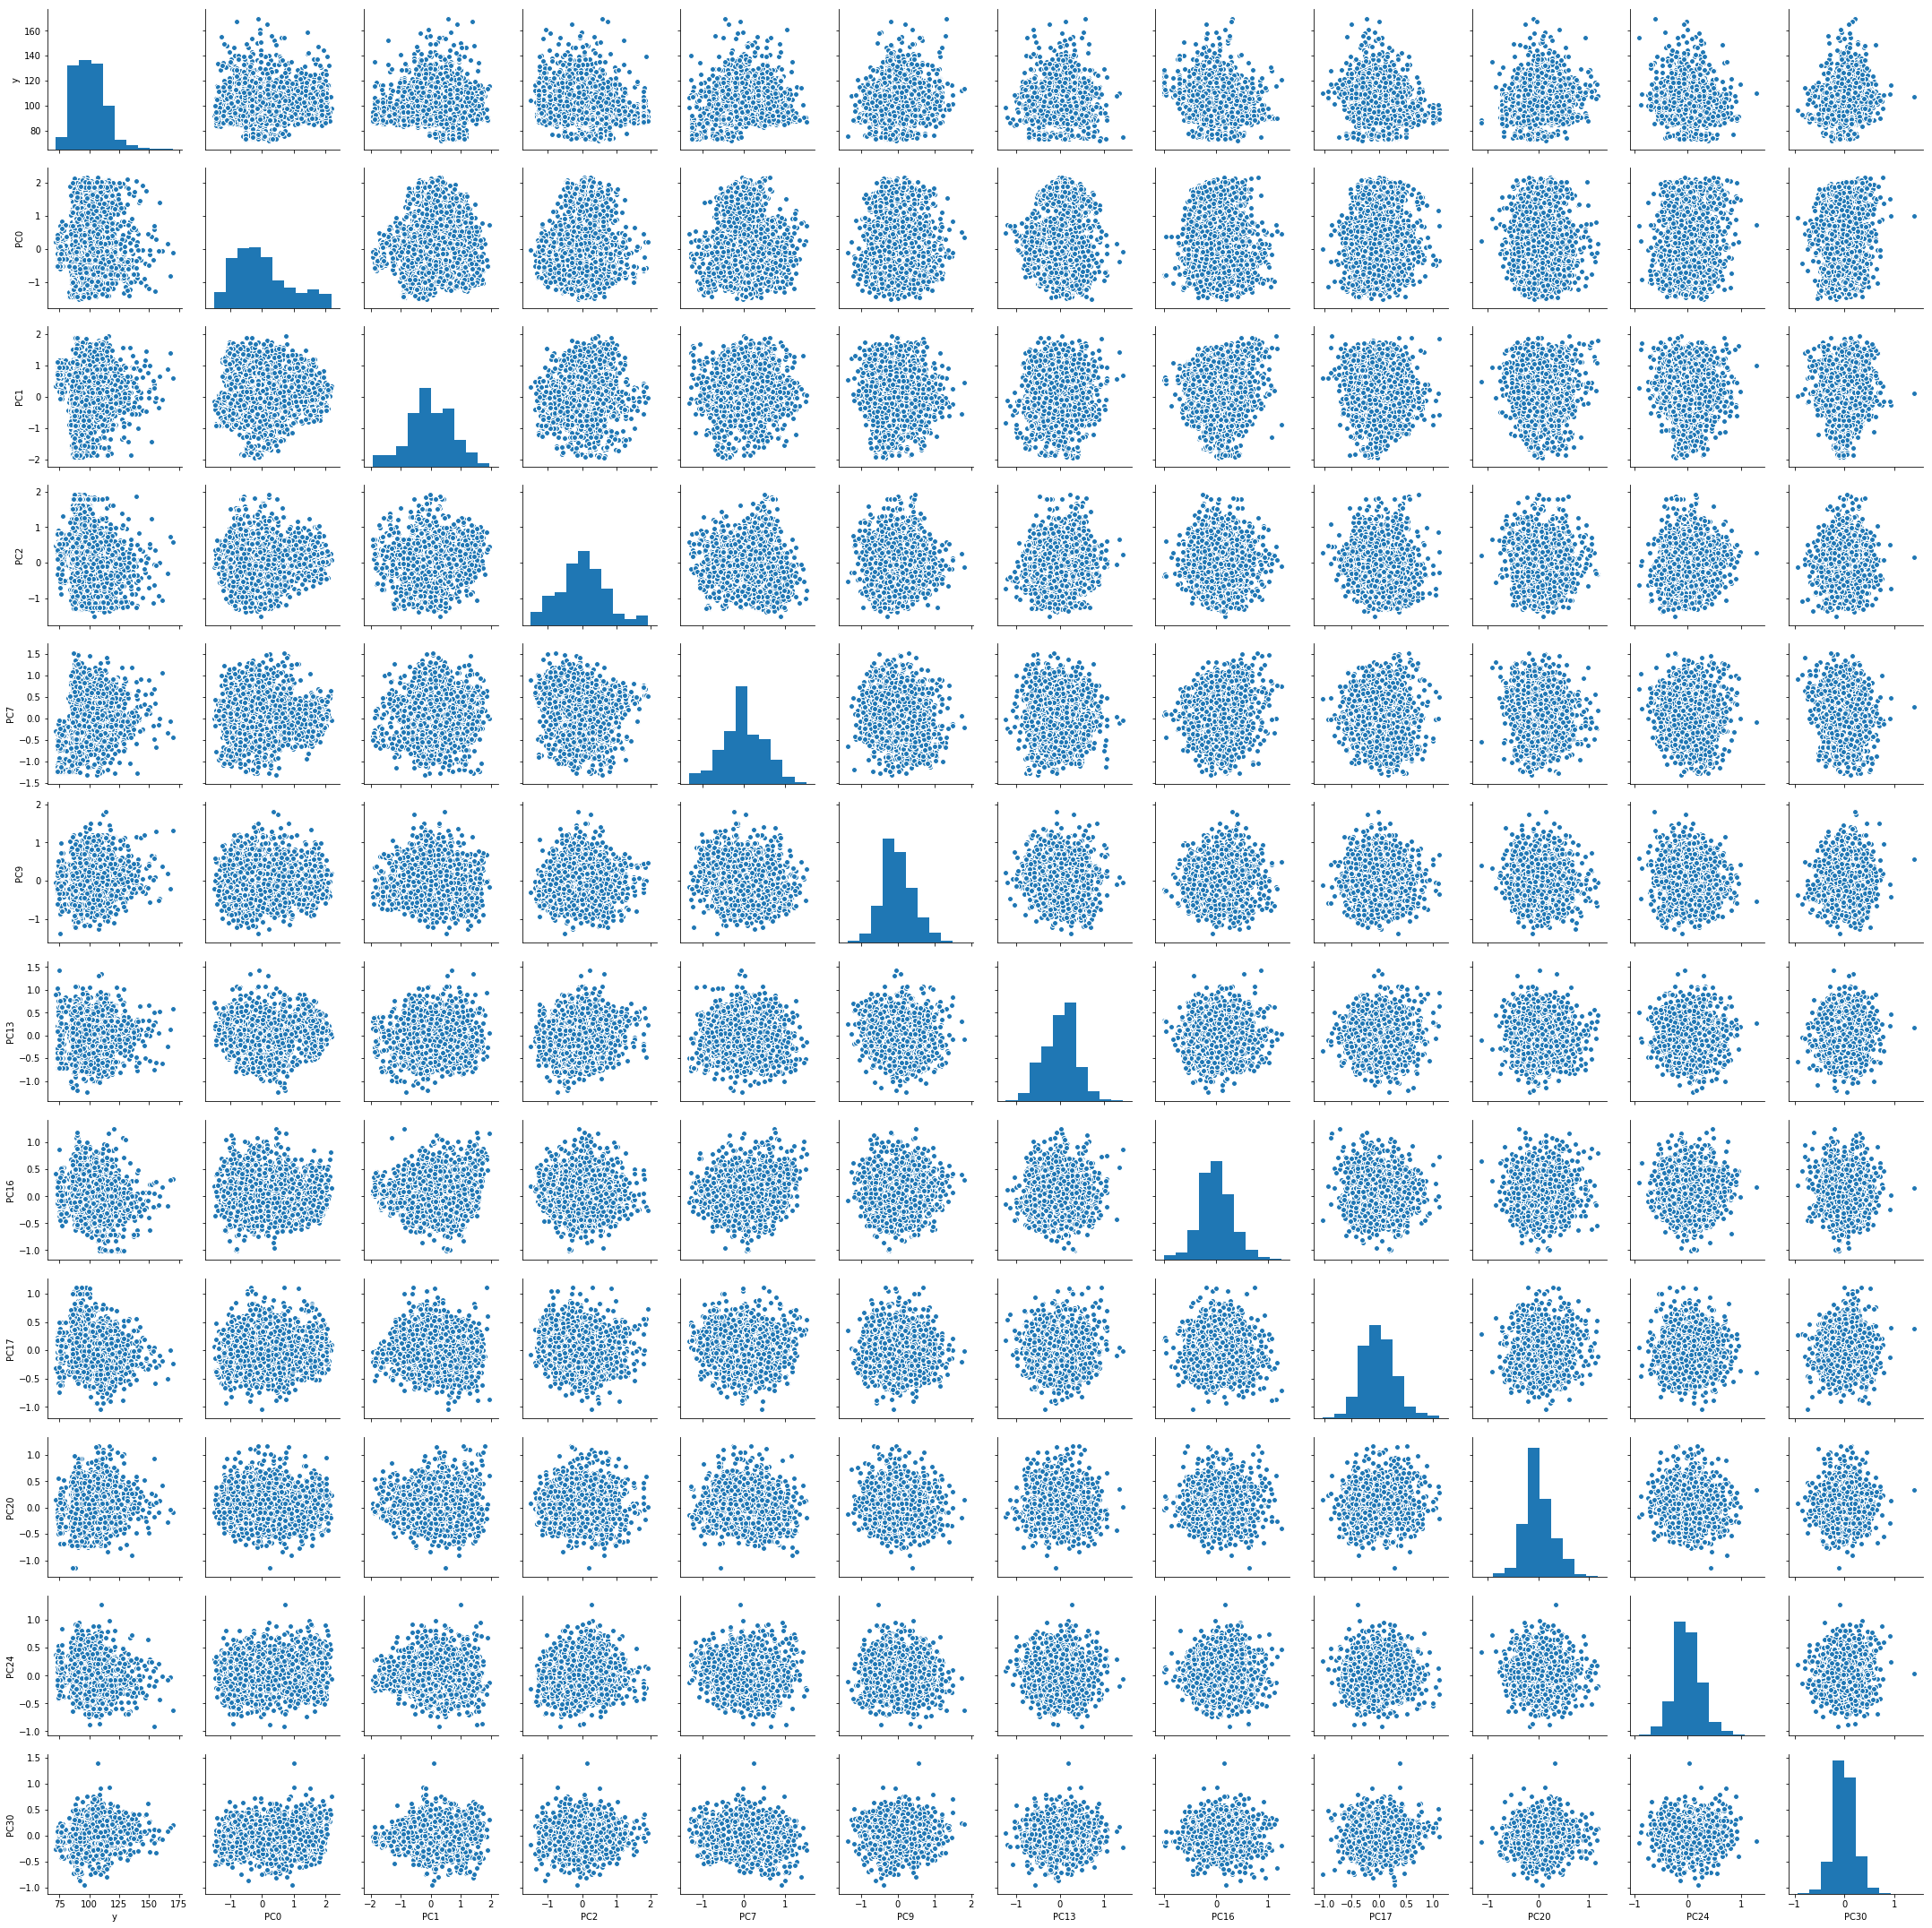

In [9]:
#Check vif
train_data_reduced.shape
pd.Series([variance_inflation_factor(train_data_PCA.values, i) 
               for i in range(train_data_PCA.shape[1])], 
              index=train_data_PCA.columns)
#sns.pairplot(train_data_PCA)
y_corr = train_data_PCA.corr().loc[:,'y']
column_names = y_corr[(abs(y_corr) > 0.10)].index
sns.pairplot(train_data_PCA[column_names])

In [43]:
#Clustering with GMM
GMM_PCA = GaussianMixture(n_components=2,random_state = 31).fit(train_data_reduced) # Instantiate and fit the model
print('Converged:',GMM_PCA.converged_) # Check if the model has converged
means = GMM_PCA.means_ 
covariances = GMM_PCA.covariances_
# Predict
prediction_PCA_probs = GMM_PCA.predict_proba(train_data_PCA.loc[:,'PC0':])
pred_PCA = pd.DataFrame(prediction_PCA_probs)
GMM_cluster = []
for i in range(len(pred_PCA)):
    GMM_cluster.append(pred_PCA.iloc[i].idxmax())
pred_PCA['GMM_cluster'] = pd.DataFrame(GMM_cluster)
pred_PCA = pd.concat((train_data_PCA,pred_PCA['GMM_cluster']),axis = 1)

Converged: True


(array([ 154., 1072., 1136., 1089.,  553.,  125.,   50.,   15.,   10.,
           4.]),
 array([ 72.11,  81.89,  91.67, 101.45, 111.23, 121.01, 130.79, 140.57,
        150.35, 160.13, 169.91]),
 <a list of 10 Patch objects>)

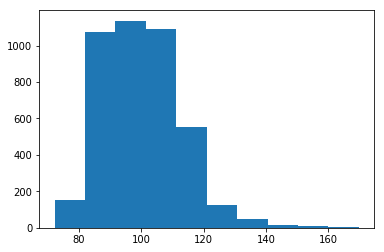

In [37]:
#Merge GMM Clusters with Train Data
plt.hist(train_data_PCA['y'])

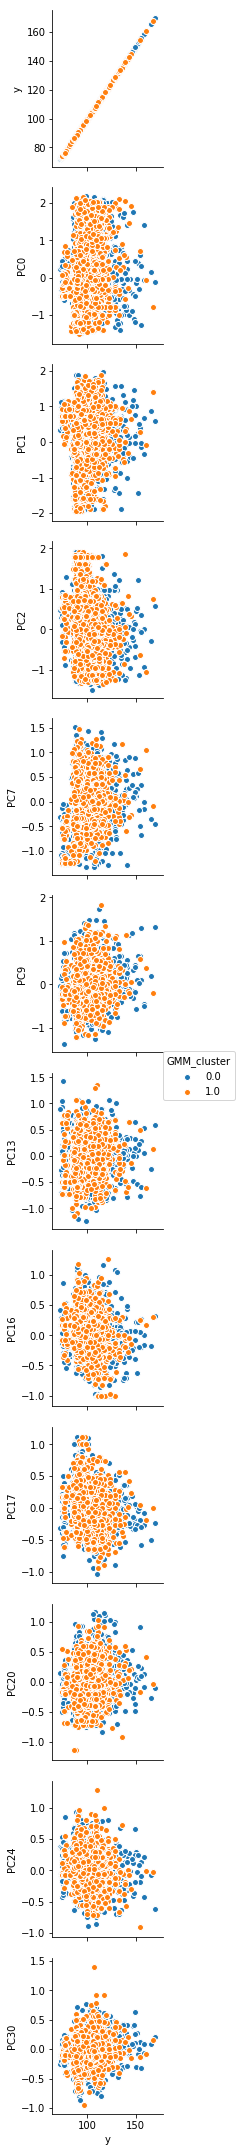

In [44]:
g = sns.pairplot(pred_PCA, x_vars = ['y'], y_vars = column_names , hue="GMM_cluster")